# Tahap 1 — Persiapan & Pengumpulan Data

In [ ]:
# Instalasi Library
!pip install opendatasets pandas numpy matplotlib seaborn plotly scikit-learn

In [ ]:
# Import Library
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Unduh Dataset dari Kaggle
# Link dataset dari Kaggle
DATASET_URL = "https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset"

# Unduh dataset ke folder lokal
od.download(DATASET_URL)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tess123
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset


100%|██████████| 11.2k/11.2k [00:00<00:00, 4.67MB/s]

In [ ]:
# Cek Folder & File Dataset
# Cek isi folder hasil unduhan
DATA_DIR = "retail-sales-dataset"
os.listdir(DATA_DIR)

['retail_sales_dataset.csv']

In [ ]:
# Load Dataset ke Pandas
# Path file CSV
file_path = os.path.join(DATA_DIR, "retail_sales_dataset.csv")

# Load dataset dengan parse tanggal otomatis
df = pd.read_csv(file_path, parse_dates=['Date'])

# Lihat 5 baris pertama
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Pemeriksaan Awal Dataset
# Informasi umum
df.info()

# Statistik dasar numerik
df.describe()

# Kolom yang tersedia
print("Kolom yang ada di dataset:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
Kolom yang ada di dataset: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [ ]:
# Cek Missing Values dan Struktur
print("Jumlah baris:", len(df))
print("Jumlah kolom:", len(df.columns))

# Cek missing values per kolom
print("\nMissing values per kolom:")
print(df.isnull().sum())

Jumlah baris: 1000
Jumlah kolom: 9

Missing values per kolom:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Simpan Data Mentah (opsional)
os.makedirs("data/raw", exist_ok=True)
df.to_csv("data/raw/retail_sales_raw.csv", index=False)

# Tahap 2 — Data Cleaning & Preprocessing

In [ ]:
# Cek Struktur Awal Dataset
df.info()
print("\nKolom dataset:", df.columns.tolist())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB

Kolom dataset: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


In [ ]:
# Standardisasi Nama Kolom
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('.', '_')
)
print("Kolom setelah distandardisasi:", df.columns.tolist())

Kolom setelah distandardisasi: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']


In [ ]:
# Tangani Missing Values
# Hitung missing values per kolom
print("Missing values sebelum dibersihkan:\n")
print(df.isnull().sum())

# Drop baris tanpa CustomerID atau Date (data invalid)
df = df.dropna(subset=['customer_id', 'date'])

# Untuk kolom lain, bisa isi default atau median (jika relevan)
df['product_category'] = df['product_category'].fillna('Unknown')

Missing values sebelum dibersihkan:

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64


In [ ]:
# Hapus Duplikasi Transaksi
dupes = df.duplicated().sum()
print("Jumlah data duplikat:", dupes)

# Hapus duplikat jika ada
if dupes > 0:
    df = df.drop_duplicates()

Jumlah data duplikat: 0


In [ ]:
# Pastiin Kolom Tanggal & Angka Benar
# Konversi tanggal
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Pastikan numeric
for col in ['quantity', 'price_per_unit', 'total_amount']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Hitung Kolom Monetary (TotalAmount)
if 'total_amount' not in df.columns:
    df['total_amount'] = df['quantity'] * df['price_per_unit']

df[['quantity', 'price_per_unit', 'total_amount']].head()

,quantity,price_per_unit,total_amount
0,3,50,150
1,2,500,1000
2,1,30,30
3,1,500,500
4,2,50,100


In [ ]:
# Tangani Outlier / Anomali
# Filter hanya transaksi valid
df = df[(df['quantity'] > 0) & (df['price_per_unit'] > 0)]
print("Jumlah baris setelah filter transaksi valid:", len(df))

Jumlah baris setelah filter transaksi valid: 1000


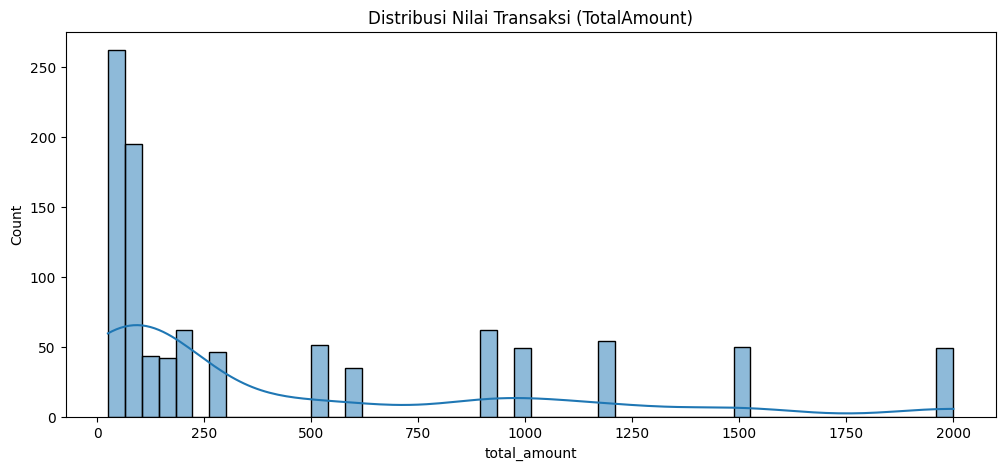

Rata-rata pembelian per transaksi: 456.0


In [ ]:
# Cek Distribusi Data Bersih
plt.figure(figsize=(12,5))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribusi Nilai Transaksi (TotalAmount)")
plt.show()

print("Rata-rata pembelian per transaksi:", df['total_amount'].mean())

In [ ]:
# Simpan Dataset Bersih
os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/transactions_clean.csv", index=False)
print("Data bersih berhasil disimpan ke: data/processed/transactions_clean.csv")

Data bersih berhasil disimpan ke: data/processed/transactions_clean.csv


# Tahap 3 — Eksplorasi Data & Feature Engineering

In [ ]:
# Informasi Dasar Dataset
print("Jumlah baris:", len(df))
print("Jumlah kolom:", len(df.columns))
print("\nKolom:", df.columns.tolist())
print("\nJumlah pelanggan unik:", df['customer_id'].nunique())
print("Rentang tanggal transaksi:", df['date'].min(), "→", df['date'].max())

Jumlah baris: 1000
Jumlah kolom: 9

Kolom: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']

Jumlah pelanggan unik: 1000
Rentang tanggal transaksi: 2023-01-01 00:00:00 → 2024-01-01 00:00:00


## Analisis Transaksi & Pelanggan

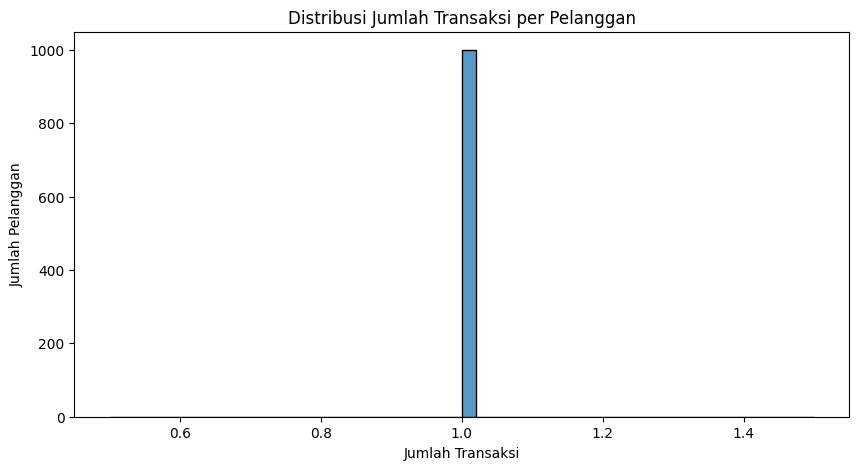

Persentase pelanggan yang melakukan transaksi lebih dari 1 kali: 0.00%


In [ ]:
# Distribusi jumlah transaksi per pelanggan
tx_per_customer = df.groupby('customer_id')['date'].nunique()
plt.figure(figsize=(10,5))
sns.histplot(tx_per_customer, bins=50, kde=False)
plt.title('Distribusi Jumlah Transaksi per Pelanggan')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jumlah Pelanggan')
plt.show()

repeat_ratio = (tx_per_customer > 1).mean() * 100
print(f"Persentase pelanggan yang melakukan transaksi lebih dari 1 kali: {repeat_ratio:.2f}%")

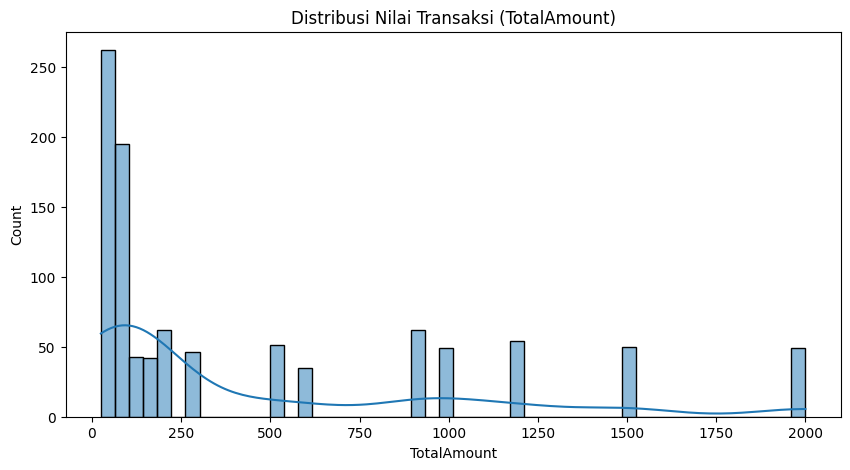

Rata-rata nilai transaksi: 456.0


In [ ]:
# Nilai penjualan per transaksi
plt.figure(figsize=(10,5))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribusi Nilai Transaksi (TotalAmount)")
plt.xlabel("TotalAmount")
plt.show()

print("Rata-rata nilai transaksi:", round(df['total_amount'].mean(), 2))

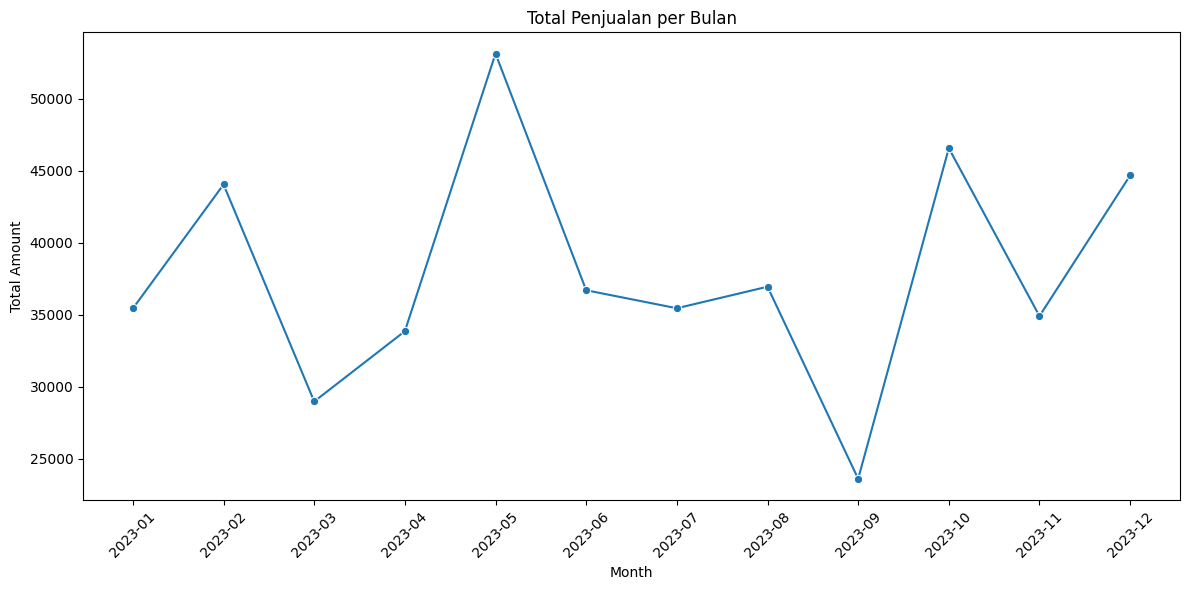

In [ ]:
# Tren Penjualan Bulanan
df['date'] = pd.to_datetime(df['date'])

# Ambil dua tahun terakhir yang ada di data, urutkan
unique_years = sorted(df['date'].dt.year.unique())

# Ambil tahun terbesar kedua (tahun terakhir sebelum yang terbaru)
target_year = unique_years[-2]

# Filter hanya tahun tersebut
df_filtered = df[df['date'].dt.year == target_year].copy()

df_filtered['month'] = df_filtered['date'].dt.strftime('%Y-%m')

monthly_sales = df_filtered.groupby('month')['total_amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('month')

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='total_amount', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Total Penjualan per Bulan')
plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3931465711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


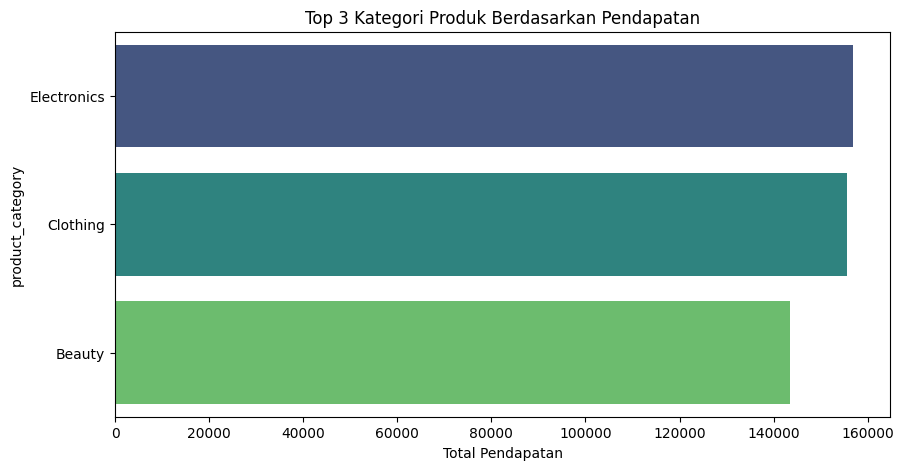

In [ ]:
# Top kategori produk (kalau kolomnya ada)
if 'product_category' in df.columns:
    top_products = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title("Top 3 Kategori Produk Berdasarkan Pendapatan")
    plt.xlabel("Total Pendapatan")
    plt.show()

## Feature Engineering — RFM Analysis

In [ ]:
# Tentukan tanggal referensi (snapshot date)
snapshot_date = df['date'].max() + pd.Timedelta(days=1)
print("Snapshot date:", snapshot_date)

# Hitung RFM
rfm = df.groupby('customer_id').agg({
    'date': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'total_amount': 'sum'
}).rename(columns={
    'date': 'recency',
    'customer_id': 'frequency',
    'total_amount': 'monetary'
}).reset_index()

rfm.head()

Snapshot date: 2024-01-02 00:00:00


,customer_id,recency,frequency,monetary
0,CUST001,39,1,150
1,CUST002,309,1,1000
2,CUST003,354,1,30
3,CUST004,226,1,500
4,CUST005,241,1,100


In [ ]:
# Statistik Dasar RFM
rfm.describe()

,recency,frequency,monetary
count,1000.000000,1000.0,1000.000000
mean,182.982000,1.0,456.000000
std,105.276773,0.0,559.997632
min,1.000000,1.0,25.000000
25%,90.000000,1.0,60.000000
50%,186.500000,1.0,135.000000
75%,269.000000,1.0,900.000000
max,366.000000,1.0,2000.000000


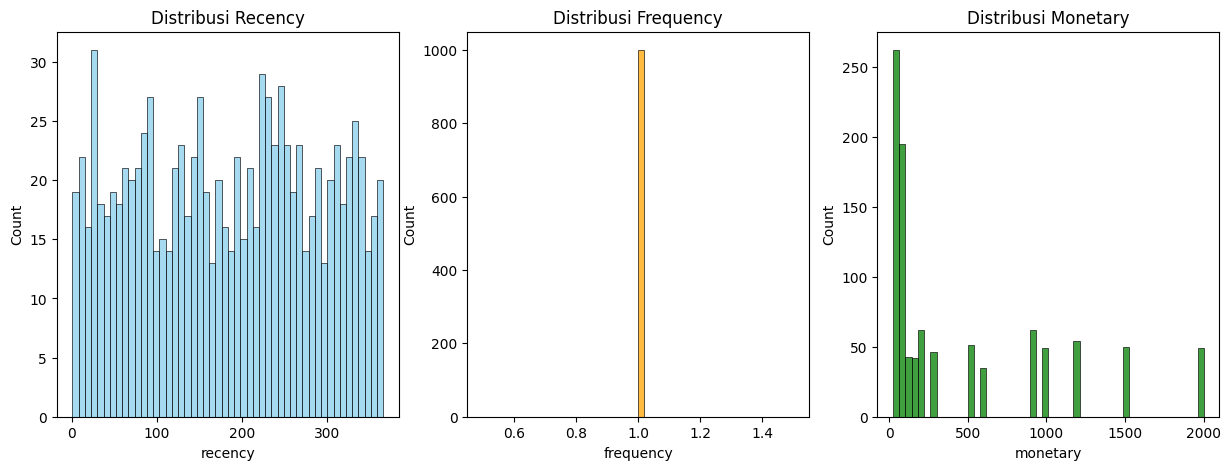

In [ ]:
# Visualisasi distribusi RFM
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(rfm['recency'], bins=50, ax=ax[0], color='skyblue')
sns.histplot(rfm['frequency'], bins=50, ax=ax[1], color='orange')
sns.histplot(rfm['monetary'], bins=50, ax=ax[2], color='green')
ax[0].set_title('Distribusi Recency')
ax[1].set_title('Distribusi Frequency')
ax[2].set_title('Distribusi Monetary')
plt.show()

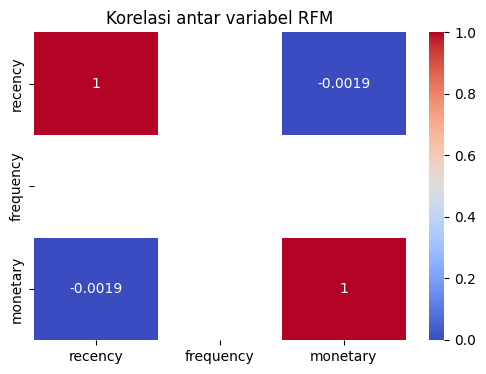

In [ ]:
# Korelasi Antar Fitur RFM
plt.figure(figsize=(6,4))
sns.heatmap(rfm[['recency','frequency','monetary']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar variabel RFM")
plt.show()

In [ ]:
# Simpan Tabel RFM
os.makedirs("data/processed", exist_ok=True)
rfm.to_csv("data/processed/rfm_table.csv", index=False)
print("RFM table disimpan di: data/processed/rfm_table.csv")

RFM table disimpan di: data/processed/rfm_table.csv


### Tahap 4 - Model Segmentasi (RFM + Clustering)




In [ ]:
# Load data RFM
rfm = pd.read_csv("data/processed/rfm_table.csv")
print("Data RFM:\n", rfm.head())

Data RFM:
   customer_id  recency  frequency  monetary
0     CUST001       39          1       150
1     CUST002      309          1      1000
2     CUST003      354          1        30
3     CUST004      226          1       500
4     CUST005      241          1       100


In [ ]:
# Normalisasi Data
# (Recency lebih kecil lebih baik, jadi arahkan agar makin besar = makin baik)
rfm_for_cluster = rfm[['recency', 'frequency', 'monetary']].copy()
rfm_for_cluster['recency'] = -rfm_for_cluster['recency']

# Standardisasi agar tiap fitur punya skala seimbang
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_cluster)

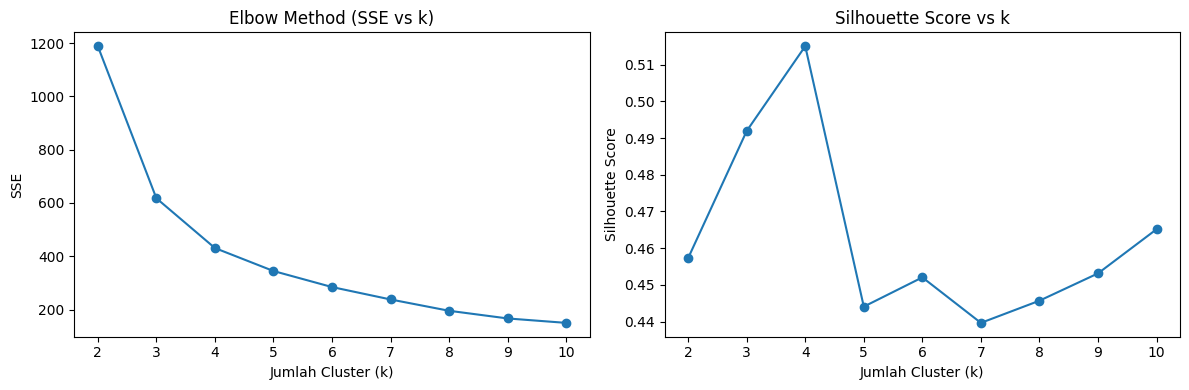

In [ ]:
# Menentukan jumlah cluster optimal (k)
sse = []
sil = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(rfm_scaled, km.labels_))

# Visualisasi
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), sse, marker='o')
plt.title('Elbow Method (SSE vs k)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(list(K_range), sil, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [ ]:
# Terapkan KMeans dengan k optimal
optimal_k = 4  # berdasarkan hasil analisis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=50)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
# Profil Tiap Cluster
cluster_profile = (
    rfm.groupby('cluster')
    .agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'sum', 'count']
    })
)

cluster_profile.columns = ['recency_mean', 'frequency_mean', 'monetary_mean',
                           'monetary_total', 'n_customer']
cluster_profile = cluster_profile.reset_index()

print("\nProfil Tiap Cluster:")
print(cluster_profile.sort_values('monetary_mean', ascending=False))


Profil Tiap Cluster:
   cluster  recency_mean  frequency_mean  monetary_mean  monetary_total  \
2        2     84.935484             1.0    1313.709677          162900   
3        3    270.521429             1.0    1283.571429          179700   
0        0     91.869919             1.0     160.121951           59085   
1        1    274.324251             1.0     147.997275           54315   

   n_customer  
2         124  
3         140  
0         369  
1         367  


In [ ]:
# Simpan Tabel RFM dengan Cluster
os.makedirs("data/processed", exist_ok=True)
rfm.to_csv("data/processed/rfm_with_cluster.csv", index=False)

print("File RFM + Cluster disimpan di: data/processed/rfm_with_cluster.csv")

File RFM + Cluster disimpan di: data/processed/rfm_with_cluster.csv


### Tahap 5 - Interpretasi & Insight Bisnis

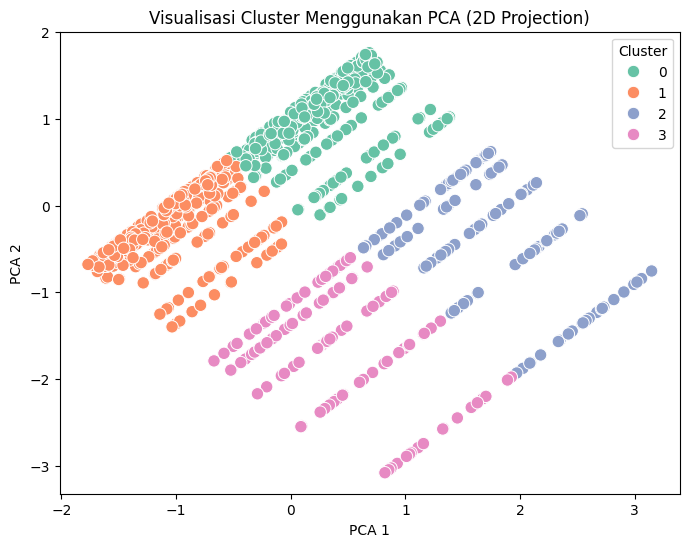

In [ ]:
# PCA untuk Visualisasi Cluster
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)

rfm['pca1'] = pca_result[:, 0]
rfm['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x='pca1', y='pca2',
    hue='cluster',
    palette='Set2',
    s=80
)
plt.title("Visualisasi Cluster Menggunakan PCA (2D Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

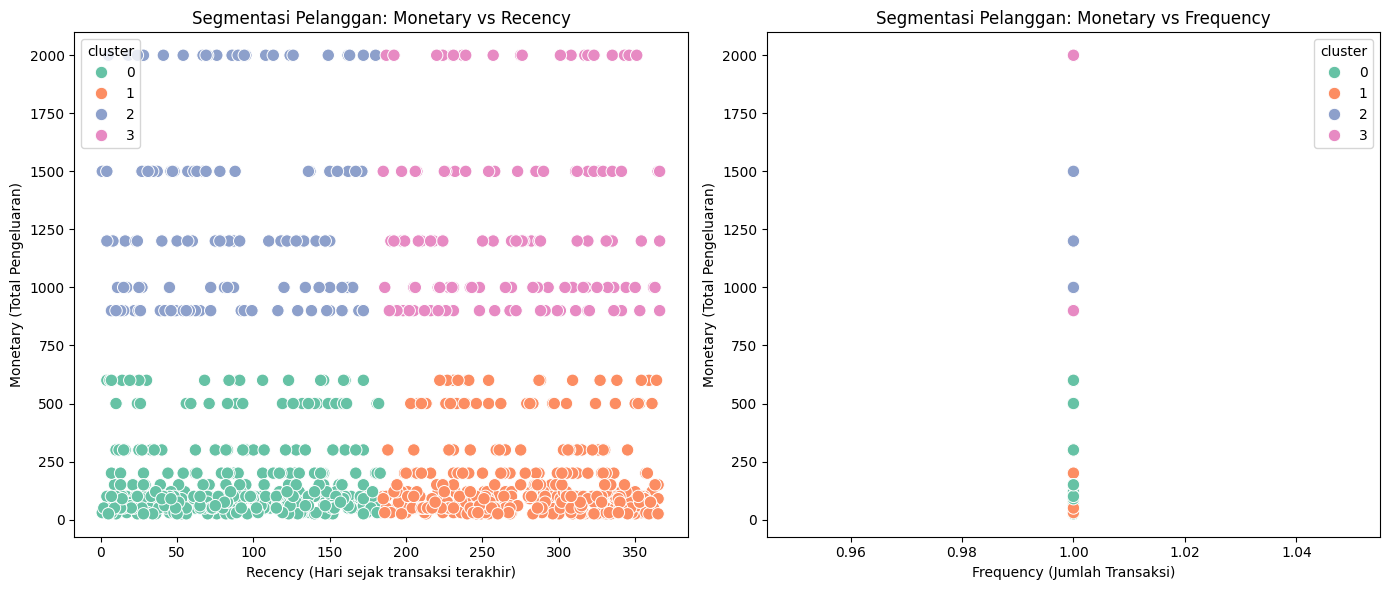

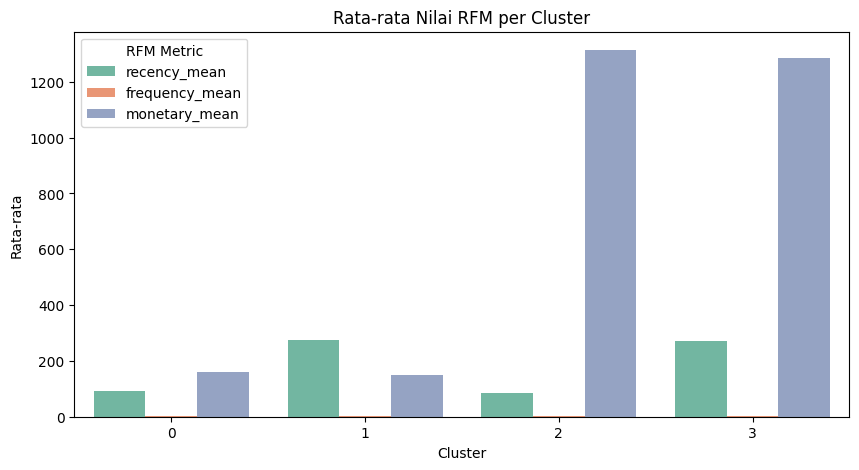

In [ ]:
# Scatter plot antar fitur RFM + Clustering
plt.figure(figsize=(14,6))

# Monetary vs Recency
plt.subplot(1,2,1)
sns.scatterplot(
    data=rfm,
    x='recency', y='monetary',
    hue='cluster', palette='Set2', s=80
)
plt.title('Segmentasi Pelanggan: Monetary vs Recency')
plt.xlabel('Recency (Hari sejak transaksi terakhir)')
plt.ylabel('Monetary (Total Pengeluaran)')

# Monetary vs Frequency
plt.subplot(1,2,2)
sns.scatterplot(
    data=rfm,
    x='frequency', y='monetary',
    hue='cluster', palette='Set2', s=80
)
plt.title('Segmentasi Pelanggan: Monetary vs Frequency')
plt.xlabel('Frequency (Jumlah Transaksi)')
plt.ylabel('Monetary (Total Pengeluaran)')

plt.tight_layout()
plt.show()

# Barplot profil rata-rata RFM
plt.figure(figsize=(10,5))
cluster_profile_melt = cluster_profile.melt(
    id_vars='cluster',
    value_vars=['recency_mean', 'frequency_mean', 'monetary_mean'],
    var_name='RFM Metric', value_name='Value'
)

sns.barplot(
    data=cluster_profile_melt,
    x='cluster', y='Value', hue='RFM Metric', palette='Set2'
)
plt.title('Rata-rata Nilai RFM per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata')
plt.show()

In [ ]:
# ANALISIS USIA PER CLUSTER
if 'age' in df.columns or 'customer_age' in df.columns:
    age_column = 'age' if 'age' in df.columns else 'customer_age'

    rfm_with_age = rfm.merge(df[['customer_id', age_column]].drop_duplicates(), on='customer_id', how='left')
    age_profile = rfm_with_age.groupby('cluster')[age_column].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

    print("\nANALISIS USIA PER CLUSTER")
    print(age_profile)

    # Insight tambahan berbasis usia
    print("\nINTERPRETASI TAMBAHAN BERDASARKAN USIA:")
    print("""
- Cluster dengan rata-rata usia tertinggi berpotensi lebih loyal dan lebih responsif terhadap email marketing atau program loyalitas.
- Cluster dengan usia lebih muda cenderung lebih aktif di media sosial dan responsif terhadap promo digital (TikTok Ads, Flash Sale, mobile push notification).
- Segmentasi pemasaran ke depan dapat memperhitungkan kombinasi usia dan persona RFM untuk kampanye yang lebih tepat sasaran.
    """)
else:
    print("\nKolom umur tidak ditemukan. Lewati analisis usia.")


ANALISIS USIA PER CLUSTER
   cluster       mean  median  min  max  count
0        0  41.495935    42.0   18   64    369
1        1  42.188011    43.0   18   64    367
2        2  41.169355    43.0   18   64    124
3        3  39.228571    38.0   18   64    140

INTERPRETASI TAMBAHAN BERDASARKAN USIA:

- Cluster dengan rata-rata usia tertinggi berpotensi lebih loyal dan lebih responsif terhadap email marketing atau program loyalitas.
- Cluster dengan usia lebih muda cenderung lebih aktif di media sosial dan responsif terhadap promo digital (TikTok Ads, Flash Sale, mobile push notification).
- Segmentasi pemasaran ke depan dapat memperhitungkan kombinasi usia dan persona RFM untuk kampanye yang lebih tepat sasaran.
    


In [ ]:
# Menentukan threshold berdasarkan distribusi RFM
recency_median = rfm['recency'].median()
monetary_75 = rfm['monetary'].quantile(0.75)  # threshold big spender

persona = {}

# Iterasi setiap cluster
for i, row in cluster_profile.iterrows():
    cid = int(row['cluster'])
    rec = row['recency_mean']
    mon = row['monetary_mean']

    # Penentuan persona
    if mon >= monetary_75:
        if rec <= recency_median:
            persona_name = "Active Big Spenders"
        else:
            persona_name = "At-Risk Big Spenders"
    elif rec <= recency_median:
        persona_name = "Active Customers"
    else:
        persona_name = "At-Risk Customers"

    persona[cid] = persona_name

# Urutkan hasil berdasarkan nomor cluster
persona_sorted = dict(sorted(persona.items(), key=lambda x: x[0]))

print("\nPERSONA PER CLUSTER (dengan tambahan karakteristik usia)\n")
for cid, name in persona_sorted.items():
    avg_age = age_profile[age_profile['cluster']==cid]['mean'].values[0]  # usia rata-rata
    med_age = age_profile[age_profile['cluster']==cid]['median'].values[0]  # usia median
    print(f"Cluster {cid}: {name} | Rata-rata Usia: {avg_age:.1f} tahun (Median: {med_age} tahun)")


PERSONA PER CLUSTER (dengan tambahan karakteristik usia)

Cluster 0: Active Customers | Rata-rata Usia: 41.5 tahun (Median: 42.0 tahun)
Cluster 1: At-Risk Customers | Rata-rata Usia: 42.2 tahun (Median: 43.0 tahun)
Cluster 2: Active Big Spenders | Rata-rata Usia: 41.2 tahun (Median: 43.0 tahun)
Cluster 3: At-Risk Big Spenders | Rata-rata Usia: 39.2 tahun (Median: 38.0 tahun)


Berdasarkan hasil analisis cluster profiling dengan jumlah cluster **K = 4**, terbentuk empat kelompok pelanggan dengan karakteristik yang berbeda berdasarkan nilai Recency, Frequency, dan Monetary (RFM).

• Cluster 0 — Active Customers: Memiliki nilai recency rendah (baru bertransaksi) dengan monetary sedang. Menunjukkan pelanggan yang baru bertransaksi dan masih cukup aktif, meskipun nilai belanjanya tidak besar.

• Cluster 1 — At-Risk Customers: Memiliki recency tinggi dan monetary kecil. Artinya pelanggan sudah lama tidak melakukan transaksi dan pengeluaran belanjanya rendah, sehingga berisiko churn.

• Cluster 2 — Active Big Spenders: Memiliki monetary sangat tinggi dan recency rendah. Ini menunjukkan pelanggan dengan nilai belanja tinggi dan masih aktif, sangat potensial untuk program VIP.

• Cluster 3 — At-Risk Big Spenders: Sama-sama memiliki monetary tinggi, tetapi recency tinggi sehingga sudah lama tidak melakukan transaksi. Ini merupakan pelanggan penting yang perlu strategi win-back agar tidak pindah ke kompetitor.

In [ ]:
print("\n\nINSIGHT BISNIS SETIAP CLUSTER\n")

for cid, name in persona_sorted.items():
    # Ambil rata-rata dan median usia dari age_profile (bukan cluster_stats)
    mean_age = round(age_profile[age_profile['cluster'] == cid]['mean'].values[0], 1)
    median_age = round(age_profile[age_profile['cluster'] == cid]['median'].values[0], 1)

    print(f"\n### Cluster {cid} — {name}")
    print(f"\n- Rata-rata usia pelanggan: {mean_age} tahun (Median: {median_age} tahun)")

    if name == "Active Big Spenders":
        print("""
- Pelanggan dengan nilai belanja sangat tinggi dan masih aktif.
- Stabil secara finansial dan berpotensi menjadi brand advocate.
- Strategi:
  • Program VIP & pengalaman eksklusif
  • Early access produk premium
  • Personalized offer berbasis data pembelian
        """)

    elif name == "At-Risk Big Spenders":
        print("""
- Dahulu belanja besar, tetapi mulai tidak aktif.
- Jika hilang, dampaknya besar ke pendapatan.
- Strategi:
  • Kampanye win-back eksklusif
  • Voucher comeback & reminder personal
  • Komunikasi emosional berbasis histori pembelian
        """)

    elif name == "Active Customers":
        print("""
- Aktif rutin membeli meskipun nilai belanja tidak besar.
- Stabil dan sangat cocok untuk retensi jangka panjang.
- Strategi:
  • Program loyalitas dan poin reward
  • Upselling melalui rekomendasi produk
  • Edukasi & engagement berbasis email/WhatsApp
        """)

    elif name == "At-Risk Customers":
        print("""
- Jarang bertransaksi dan pengeluaran kecil.
- Risiko besar berpindah ke kompetitor.
- Strategi:
  • Promo ringan dan retargeting
  • Push notification berisi diskon personal
  • Edukasi benefit dan reminder produk relevan
        """)



INSIGHT BISNIS SETIAP CLUSTER


### Cluster 0 — Active Customers

- Rata-rata usia pelanggan: 41.5 tahun (Median: 42.0 tahun)

- Aktif rutin membeli meskipun nilai belanja tidak besar.
- Stabil dan sangat cocok untuk retensi jangka panjang.
- Strategi:
  • Program loyalitas dan poin reward
  • Upselling melalui rekomendasi produk
  • Edukasi & engagement berbasis email/WhatsApp
        

### Cluster 1 — At-Risk Customers

- Rata-rata usia pelanggan: 42.2 tahun (Median: 43.0 tahun)

- Jarang bertransaksi dan pengeluaran kecil.
- Risiko besar berpindah ke kompetitor.
- Strategi:
  • Promo ringan dan retargeting
  • Push notification berisi diskon personal
  • Edukasi benefit dan reminder produk relevan
        

### Cluster 2 — Active Big Spenders

- Rata-rata usia pelanggan: 41.2 tahun (Median: 43.0 tahun)

- Pelanggan dengan nilai belanja sangat tinggi dan masih aktif.
- Stabil secara finansial dan berpotensi menjadi brand advocate.
- Strategi:
  • Program VIP & pengalaman eksklusif


In [ ]:
# Simpan RFM + Cluster + PCA
rfm.to_csv("data/processed/rfm_with_cluster_insight.csv", index=False)

print("File akhir insight cluster disimpan di: data/processed/rfm_with_cluster_insight.csv")

File akhir insight cluster disimpan di: data/processed/rfm_with_cluster_insight.csv
